# 1. Loading the NIPS papers
<p>La conférence NIPS (Neural Information Processing Systems) est l’un des événements les plus prestigieux de la communauté d’apprentissage automatique. À chaque conférence du NIPS, un grand nombre d'articles de recherche sont publiés. Plus de 50 000 fichiers PDF ont été automatiquement téléchargés et traités pour obtenir un jeu de données sur diverses techniques d’apprentissage automatique.Ces papiers NIPS sont stockés dans:
  <a> https://www.kaggle.com/benhamner/nips-papers/downloads/nips-papers.zip/2 <a/> 
       Le fichier CSV contient des informations sur les différents articles du NIPS publiés de 1987 à 2017 (30 ans!). Ces articles traitent d'une grande variété de sujets liés à l'apprentissage automatique, des réseaux de neurones aux méthodes d'optimisation, etc. </p>
<img width="400" height="400" src="https://ivado.ca/wp-content/uploads/2018/09/NIPS.jpg" class="attachment-full size-full wp-post-image" alt="" srcset="https://ivado.ca/wp-content/uploads/2018/09/NIPS.jpg 400w, https://ivado.ca/wp-content/uploads/2018/09/NIPS-150x150.jpg 150w, https://ivado.ca/wp-content/uploads/2018/09/NIPS-300x300.jpg 300w, https://ivado.ca/wp-content/uploads/2018/09/NIPS-60x60.jpg 60w, https://ivado.ca/wp-content/uploads/2018/09/NIPS-120x120.jpg 120w" sizes="(max-width: 100px) 100vw, 100px">

In [1]:
# Importing modules
import pandas as pd
# Read datasets/papers.csv into papers
papers =pd.read_csv("C:/Users/Haytham/Desktop/The Hottest Topics in Machine Learning/datasets/papers.csv")

# Print out the first rows of papers
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## 2. Preparing the data for analysis
<p>Pour l'analyse des articles, nous ne nous intéressons qu'aux données textuelles associées à l'article, ainsi qu'à l'année de publication de l'article.<p/>
<p>Nous analyserons ces données textuelles en utilisant le traitement du langage naturel. Comme le fichier contient des métadonnées telles que les identifiants et les noms de fichiers, il est nécessaire de supprimer toutes les colonnes ne contenant pas d'informations textuelles utiles.</p>

In [2]:
# Remove the columns
papers=papers.drop(['id','event_type','pdf_name'],axis=1)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## 3. Plotting how machine learning has evolved over time
<p> Pour comprendre comment le domaine de l'apprentissage automatique a récemment explosé en popularité, nous commencerons par visualiser le nombre de publications par an. </p>
<p> En examinant le nombre d'articles publiés par an, nous pouvons comprendre l'étendue de la «révolution» de l'apprentissage automatique! Généralement, cette augmentation significative de la popularité est attribuée à la grande quantité de puissance de calcul, de données et d’améliorations apportées aux algorithmes. </P>

Text(0.5, 1.0, 'the number of publications per year.')

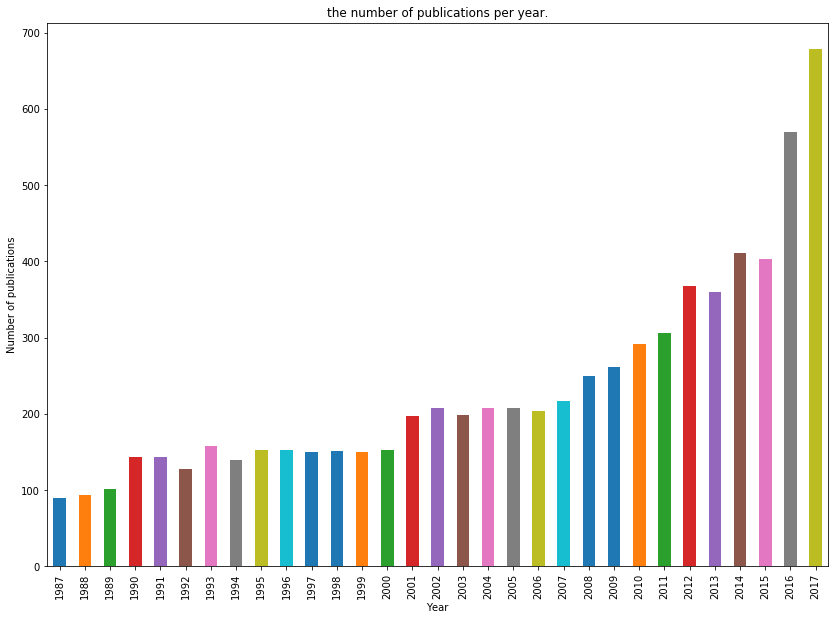

In [3]:
# Group the papers by year
groups =papers.groupby(['year'])

# Determine the size of each group
counts =groups.size()
# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar', figsize=(14, 10))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of publications') # add y-label to the plot
plt.title('the number of publications per year.') # add title to the plot

## 4. Preprocessing the text data
<p> Analysons maintenant les titres des différents articles pour identifier les tendances de l’apprentissage automatique. Premièrement, nous allons effectuer un prétraitement simple sur les titres afin de les rendre plus faciles à analyser. Nous allons utiliser une expression régulière pour supprimer toute ponctuation dans le titre. Ensuite, nous effectuerons des minuscules. Nous imprimerons ensuite les titres des premières lignes avant et après l'application de la modification.<p/>

In [4]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?#&"''\:]', '', x))

# Convert the titles to lowercase
papers['title_processed'] =papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers['title_processed'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object


## 5. Bag of words on the dataset 
<p> Créons maintenant un dictionnaire à partir de 'long_string' contenant le nombre de fois qu'un mot apparaît dans le set d'apprentissage. Pour ce faire, passons 'long_string' à gensim.corpora.Dictionary () et appelons-le 'dictionnaire'.<p/>

In [6]:
# Import the library 
from nltk.tokenize import word_tokenize

In [7]:
# Join the different processed titles together.
long_string =' '.join(papers['title_processed'].tolist())
word_tokens=word_tokenize(long_string)

In [8]:
word_tokens[:10]

['self-organization',
 'of',
 'associative',
 'database',
 'and',
 'its',
 'applications',
 'a',
 'mean',
 'field']

In [9]:
import numpy as np
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
processed_docs =[w for w in word_tokens if not w in stop_words]
  
processed_docs[:5]

['self-organization', 'associative', 'database', 'applications', 'mean']

In [10]:
from collections import Counter
counter=Counter(processed_docs)
counter.most_common(10)

[('learning', 1553),
 ('neural', 644),
 ('networks', 601),
 ('models', 487),
 ('using', 457),
 ('model', 387),
 ('bayesian', 287),
 ('data', 268),
 ('inference', 264),
 ('network', 260)]

## 6.  A word cloud to visualize the preprocessed text data
<p>In order to verify whether the preprocessing happened correctly, we can make a word cloud of the titles of the research papers. This will give us a visual representation of the most common words. Visualisation is key to understanding whether we are still on the right track! In addition, it allows us to verify whether we need additional preprocessing before further analyzing the text data.</p>
<p>Python a un grand nombre de bibliothèques ouvertes! Au lieu d'essayer de développer une méthode pour créer nous-mêmes des nuages de mots, nous utiliserons celui d'Andreas Mueller.<a href="http://amueller.github.io/word_cloud/">wordcloud library</a>.</p>

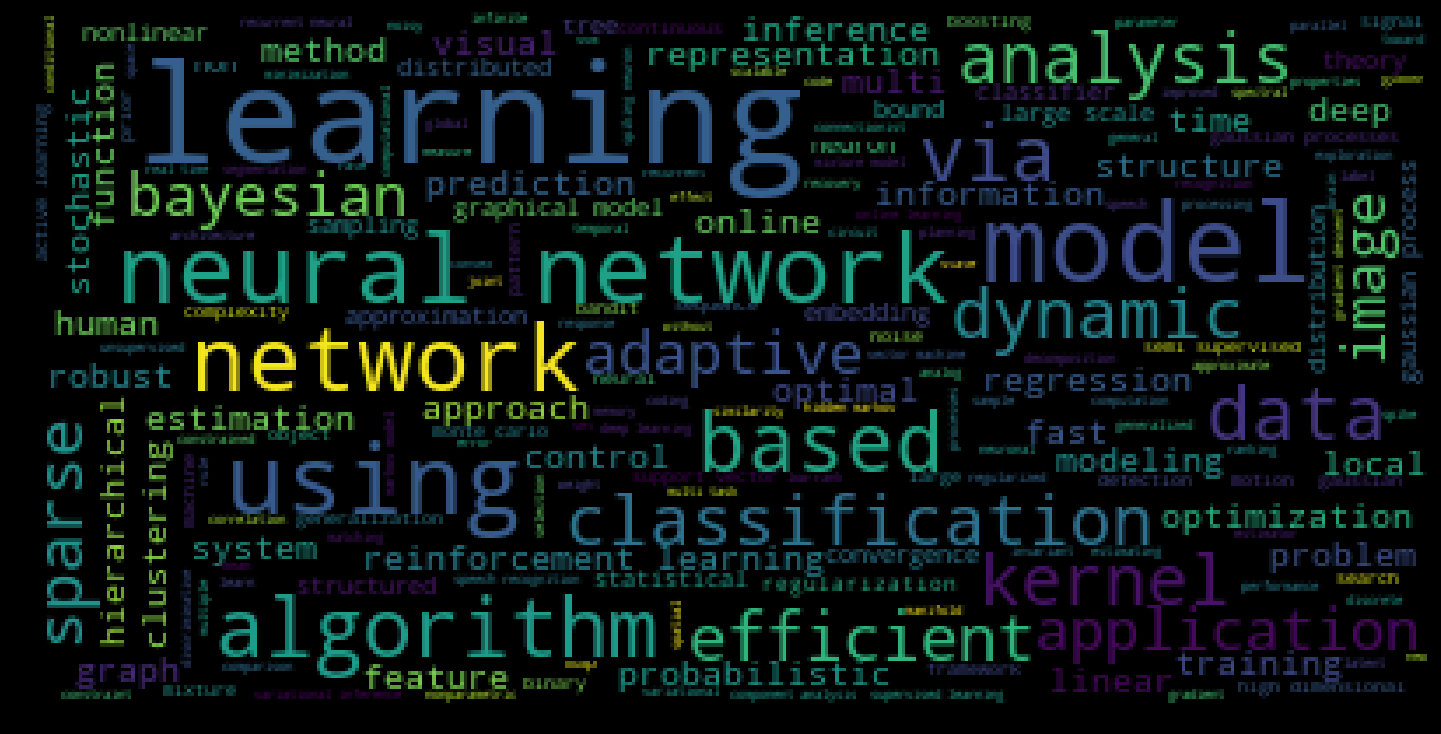

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string =' '.join(papers['title_processed'].tolist())

# Create a WordCloud object
wordcloud =WordCloud(width=1000, height=600)


# Generate a word cloud
wordcloud = WordCloud(max_font_size=40).generate(long_string)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## 7.  Prepare the text for LDA analysis
<p> La principale méthode d’analyse de texte que nous allons utiliser est latent Dirichlet allocation (LDA). LDA est capable de détecter des sujets sur de grands ensembles de documents, en déterminant quels sont les "sujets" principaux dans un grand ensemble de textes sans étiquette. Un «sujet» est un ensemble de mots qui ont tendance à être fréquents. L'hypothèse est que LDA pourrait être en mesure de clarifier quels sont les différents sujets des titres de recherche. Ces sujets peuvent ensuite être utilisés comme point de départ pour une analyse plus approfondie. </P>
<p> LDA ne fonctionne pas directement sur les données texte. Premièrement, il est nécessaire de convertir les documents en une simple représentation vectorielle. Cette représentation sera ensuite utilisée par LDA pour déterminer les sujets. Chaque entrée d'un "vecteur de document" correspond au nombre d'occurrences d'un mot dans le document. En conclusion, nous allons convertir une liste de titres en une liste de vecteurs, dont la longueur est égale au vocabulaire.Par exemple, <em> "Analyse des tendances de l'apprentissage automatique avec des réseaux de neurones" </ em> serait transformé en <code> [1, 0, 1, ..., 1, 0] </ code>. </ P >
<p> Nous allons ensuite tracer les 10 mots les plus courants en fonction du résultat de cette opération (la liste des vecteurs de document). Pour vérifier, ces mots doivent également figurer dans le nuage de mots. </ P>

In [12]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()



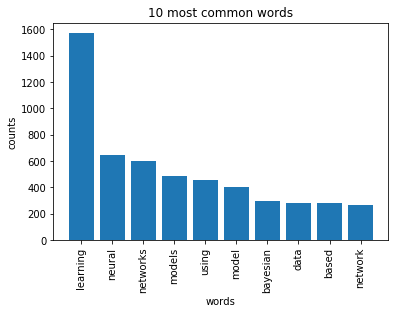

In [13]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data =count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 8. Analysing trends with LDA

<p> Enfin, les titres de recherche seront analysés à l’aide de la LDA. Notez que pour traiter un nouvel ensemble de documents (par exemple, des articles de presse), un ensemble similaire d'étapes sera nécessaire pour prétraiter les données. Le flux créé ici peut donc facilement être exporté vers un nouveau jeu de données texte. </P>
<p> Le seul paramètre que nous allons modifier est le nombre de sujets de l'algorithme LDA. Généralement, on calcule la métrique de «perplexité» pour déterminer le nombre de sujets le mieux adapté et on effectue une itération sur différentes quantités de sujets jusqu'à ce que la «perplexité» la plus basse soit trouvée. Pour le moment, jouons avec un nombre différent de sujets. À partir de là, nous pouvons distinguer le sujet de chaque sujet ('neural networks', 'reinforcement learning', 'kernel methods', 'gaussian processes', etc.). </P>

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = int(15)
number_words =  int(10)

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning markov models decision hidden processes unsupervised random using model

Topic #1:
inference approximate bayesian belief efficient map neuron propagation models network

Topic #2:
recognition neural visual using networks speech learning time model multi

Topic #3:
learning online local classification active kernels algorithm probability neighbor metric

Topic #4:
learning sparse high dimensional data reinforcement multi using decomposition tensor

Topic #5:
learning kernel supervised fast semi convergence spectral multi regression boosting

Topic #6:
models large learning scale deep generative margin data neural dependent

Topic #7:
analysis learning feature structure carlo monte latent independent component selection

Topic #8:
learning distributed model models based graphical action image motion detection

Topic #9:
images learning using adaptation self domain based 3d bayes models

Topic #10:
optimization gradient stochastic convex vector su